# The Different Factors of Salary

_Spring 2025 Data Science Project_

**Chinaza Ezinne**


## Table of Contents

-   [Introduction](#introduction)
-   [Data Curation](#data-curation)
-   [Data Processing and Visualization](#Data-Processing-and-Visualization)
-   [Data Modeling](#Data-Modeling)
-   [Conclusion](#Conclusion)

## Introduction

The purpose of this tutorial is to familiarize yourself with the data science pipeline. This pipeline includes the process of Data Collection, Data Curation and Processing, Data Analysis and Visualization, Data Modeling, and Data Interpretation. Understanding how to complete these steps and how to digest these kinds of numerical data is important as we move in to an Artificial Intelligence era. Additionally being able to discern what data is real and fake data will allow you to not be fooled or swayed by misinformation. This specific tutorial will dive into the idea of how higher education affects salary, as we move into a world of AI more and more jobs are at risk of being fazed out by AI, so understanding the different factors that contribute to a higher salary will prove to be very fundamental for the future. So join as we uncover the different factors of salary.


## Data Curation

This part of the tutorial will go over the obtaining and cleaning the data that we will be analyzing. So in this section we will be obtaining Salary data and we will clean the data so that all of the data is uniform in their format. First we will request data from [Kaggle](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data) and download and save the csv files as "Salary_Data.csv".


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Here we import all of the necessary modules that we will be using for the tutorial, including Pandas, Numpy, Seaborn, SciPy, and Scikit-learn. These modules will allow us to process and analyze our data. Once you have these modules imported you can continue with the tutorial running each code block.


**Import data**


In [54]:
df = pd.read_csv(f'Salary_Data.csv')

display(df)
display(df.dtypes)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

**Parse data**


In [55]:

cleaned_df = df[ df['Age'].isna() | df['Gender'].isna() | df['Education Level'].isna() | df['Job Title'].isna() | df['Years of Experience'].isna() | df['Salary'].isna() ]

cleaned_df = df.dropna()

def clean_education_level( education_level:str ) -> str :
    if education_level == "Bachelor's":
        return "Bachelor's Degree"
    elif education_level == "Master's":
        return "Master's Degree"
    elif education_level == "phD":
        return "PhD"
    else:
        return education_level

cleaned_df['Education Level'] = cleaned_df['Education Level'].apply(clean_education_level)
cleaned_df = cleaned_df.sort_values(by="Age", ascending=True)
display(cleaned_df)


/var/folders/67/nx480sn114s0fyjns1b1yfzh0000gn/T/ipykernel_73103/3339904926.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Education Level'] = cleaned_df['Education Level'].apply(clean_education_level)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5057,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5122,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5109,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5096,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5083,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
...,...,...,...,...,...,...
1225,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1258,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1236,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1305,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0


As we can see after parsing and curating all of the data that there should be no NA points and all the education levels have uniform formatting.


## Data Processing and Visualization


In this part of our tutorial we will be processing the data that we have and we will transform our data into different Machine Learning models, but before we do that lets first have a look at some of the different qualities of our DataFrame.

In [56]:
display(cleaned_df['Age'].unique())
display(cleaned_df['Age'].value_counts())
display(cleaned_df['Gender'].unique())
display(cleaned_df['Gender'].value_counts())
display(cleaned_df['Education Level'].unique())
display(cleaned_df['Education Level'].value_counts())
display(cleaned_df['Job Title'].unique())
display(cleaned_df['Job Title'].value_counts().head(10))
display(cleaned_df['Years of Experience'].unique())
display(cleaned_df['Years of Experience'].value_counts())
display(cleaned_df['Salary'].unique())
display(cleaned_df['Salary'].value_counts())


array([21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 60.,
       61., 62.])

Age
27.0    516
30.0    449
29.0    444
28.0    429
33.0    398
26.0    393
31.0    364
32.0    351
34.0    309
25.0    284
36.0    281
24.0    240
35.0    200
42.0    176
43.0    158
39.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
54.0     68
47.0     47
51.0     30
52.0     29
21.0     18
55.0     16
22.0     15
56.0     11
57.0      9
53.0      7
58.0      7
60.0      5
62.0      5
61.0      2
Name: count, dtype: int64

array(['Female', 'Male', 'Other'], dtype=object)

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

array(['High School', "Bachelor's Degree", 'PhD', "Master's Degree"],
      dtype=object)

Education Level
Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: count, dtype: int64

array(['Junior Sales Representative', 'Receptionist', 'Sales Associate',
       'Front End Developer', 'Software Engineer', 'Back end Developer',
       'Junior Sales Associate', 'Junior HR Generalist',
       'Senior Project Engineer', 'Software Developer',
       'Sales Representative', 'Software Engineer Manager',
       'Sales Manager', 'Junior HR Coordinator', 'Front end Developer',
       'Sales Executive', 'Full Stack Engineer', 'Data Analyst',
       'Junior Marketing Analyst', 'Junior Web Developer',
       'Delivery Driver', 'Junior Developer', 'Web Developer',
       'Marketing Analyst', 'Financial Analyst', 'Juniour HR Coordinator',
       'Product Manager', 'Digital Marketing Manager',
       'Customer Service Representative', 'Junior Software Developer',
       'Marketing Manager', 'Marketing Coordinator',
       'Human Resources Coordinator', 'Junior Software Engineer',
       'Junior Marketing Specialist', 'Help Desk Analyst',
       'Data Entry Clerk', 'Graphic Designe

Job Title
Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          308
Marketing Manager            255
Senior Software Engineer     244
Back end Developer           244
Name: count, dtype: int64

array([ 0. ,  1. ,  2. ,  0.5,  3. , 12. ,  1.5,  5. ,  4. ,  7. ,  6. ,
        8. , 11. ,  9. , 10. , 13. , 14. , 15. , 16. , 17. , 19. , 20. ,
       18. , 22. , 21. , 23. , 24. , 25. , 26. , 28. , 27. , 29. , 31. ,
       32. , 30. , 33. , 34. ])

Years of Experience
2.0     610
3.0     602
1.0     540
4.0     522
6.0     438
8.0     425
5.0     399
9.0     380
7.0     352
11.0    320
12.0    294
14.0    253
16.0    242
13.0    209
10.0    192
15.0    129
18.0    126
19.0    121
0.0     120
17.0    106
20.0     61
22.0     47
21.0     42
23.0     37
25.0     24
24.0     19
28.0     16
29.0     12
1.5      12
27.0     11
32.0     10
26.0      7
30.0      6
33.0      6
31.0      5
34.0      2
0.5       1
Name: count, dtype: int64

array([ 25000.,  50000.,  51832.,  40000.,  52831.,  45000.,  35000.,
          579.,  32000.,  52612.,  51831.,  62807.,  47898.,  52807.,
        26000.,  52779.,  60000.,  55000.,  95000.,  92000.,  90000.,
       119836.,  62852.,  30000.,  28000.,  64182., 100000.,  55538.,
        51265.,  52731., 106686., 125000.,  61095.,  63901., 106132.,
        55935., 110000., 115000.,  75000., 135000., 169159.,  90249.,
        69032.,  65000.,  47000.,    550.,  85000., 120000.,  31000.,
        70000., 130000.,  67556.,  88678.,  79652.,  63789.,  91397.,
        73218.,  65840.,  70216.,  73640.,  91062.,  75656.,  42000.,
        38000.,  89843.,  72649.,  48000.,  90944.,  85825.,  52000.,
        75072., 102859.,  68472.,  76898.,  80000., 140000., 180000.,
       150000.,  87584.,  78354.,  83577.,  36000., 160000.,  68732.,
        61000.,  79767.,  75969.,  62000.,  80247.,  68611.,  82683.,
        73938.,  73895.,  41000.,  77606., 105000.,  70397.,  84181.,
        72389.,  767

Salary
140000.0    287
120000.0    282
160000.0    276
55000.0     251
60000.0     231
           ... 
187951.0      1
143084.0      1
167207.0      1
179000.0      1
183530.0      1
Name: count, Length: 444, dtype: int64

We see that we have no NAs in our dataset and we can see the different types and occurrence for each value in our DataFrame. Although for simplicity sake of our analysis we will only look at those with the occupation of: Software Engineer,
Data Scientist,
Software Engineer Manager,
Data Analyst,
Senior Project Engineer,
Product Manager,
Full Stack Engineer,
Marketing Manager,
Senior Software Engineer, and
Back end Developer

 ***Visualization***

Now that the data is cleaned lets take the time to take a look at some of the different factors that affect Salary. In order to visualize the data that we have we will first need to apply a statistical test to the DataFrame, then we can plot the points on different plots.

**Education Level to Salary**

np.float64(36706.69419642857)

np.float64(95082.90863952333)

np.float64(130112.05645161291)

np.float64(165651.4579985391)

F_onewayResult(statistic=np.float64(1630.9393525726196), pvalue=np.float64(0.0))

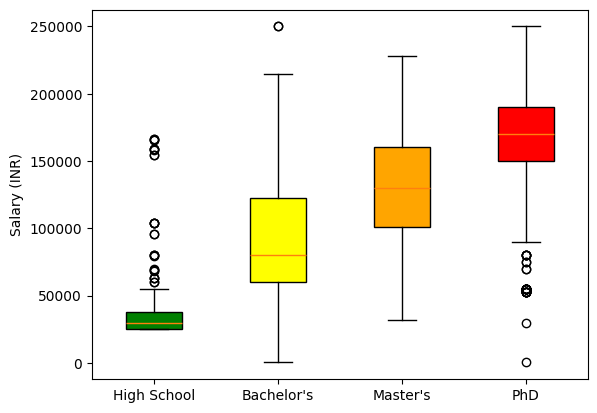

In [57]:


education_level_groups = cleaned_df.groupby('Education Level')

high_school = education_level_groups.Salary.get_group(name="High School")
bachelors = education_level_groups.Salary.get_group(name="Bachelor's Degree")
masters = education_level_groups.Salary.get_group(name="Master's Degree")
phd = education_level_groups.Salary.get_group(name="PhD")

display(high_school.mean())
display(bachelors.mean())
display(masters.mean())
display(phd.mean())

education_level_salary_ANOVA = sp.stats.f_oneway(high_school, bachelors, masters, phd)

display(education_level_salary_ANOVA)

labels = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']
colors = ['green', 'yellow', 'orange', 'red']

fig, ax = plt.subplots()
ax.set_ylabel('Salary (INR)')

bplot = ax.boxplot([high_school, bachelors, masters, phd],
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

We can see with education level that the median salary for each level consistently increases as we increase education level.

**Gender to Salary**

np.float64(121395.69763007356)

np.float64(350.0)

np.float64(107888.99867241952)

np.float64(500.0)

TtestResult(statistic=np.float64(10.489305680117718), pvalue=np.float64(1.5264743340303035e-25), df=np.float64(6682.0))

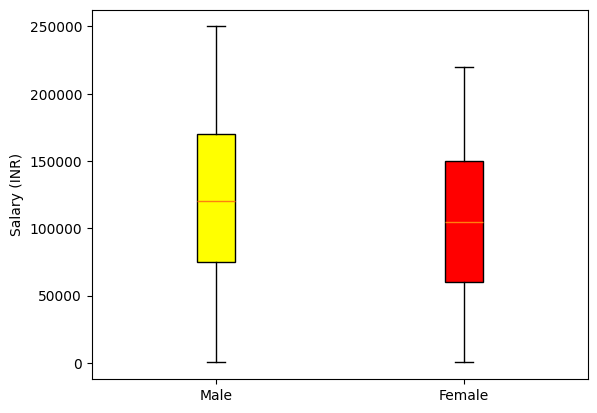

In [58]:
gender_salary_groups = cleaned_df.groupby('Gender')

male = gender_salary_groups.Salary.get_group(name="Male")
female = gender_salary_groups.Salary.get_group(name="Female")

display(male.mean())
display(male.min())
display(female.mean())
display(female.min())

gender_salary_ttest = sp.stats.ttest_ind(male, female)

display(gender_salary_ttest)

labels = ['Male', 'Female']
colors = ['yellow', 'red']

fig, ax = plt.subplots()
ax.set_ylabel('Salary (INR)')

bplot = ax.boxplot([male, female],
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

We can see as well that there is a significant effect on salary by gender, but the effect is not nearly as significant as education level.

np.float64(0.8089681695139437)

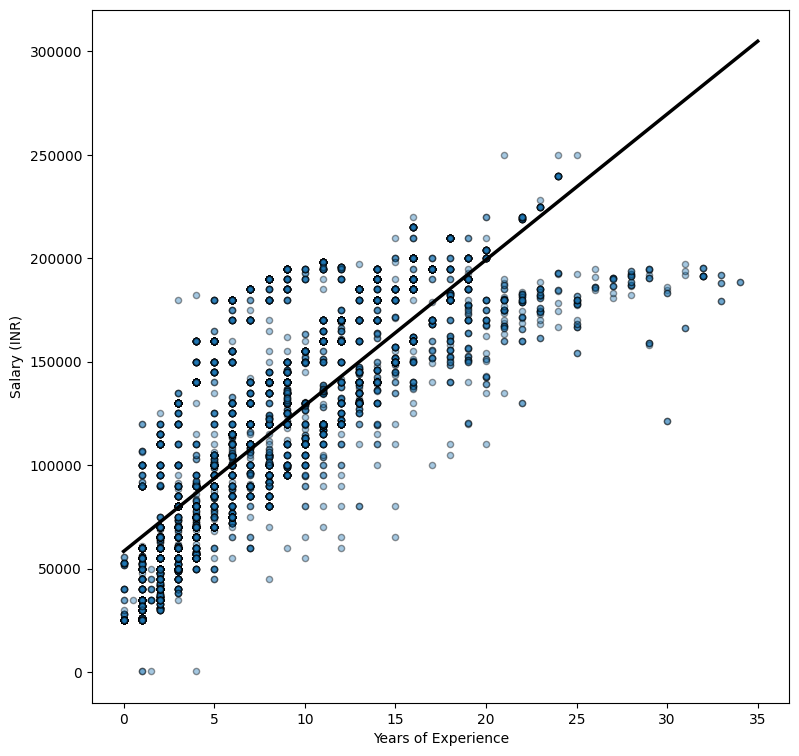

In [59]:
yoe_salary_correlation = cleaned_df['Years of Experience'].corr(cleaned_df['Salary'])
display(yoe_salary_correlation)

fig, ax = plt.subplots(figsize=(9, 9))

ax.scatter(cleaned_df['Years of Experience'], cleaned_df['Salary'], s=20, alpha=0.4, edgecolors="k")
ax.set_ylabel('Salary (INR)')
ax.set_xlabel('Years of Experience')
b, a = np.polyfit(cleaned_df['Years of Experience'], cleaned_df['Salary'], deg=1)

xseq = np.linspace(0, 35, num=100)

ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

Additionally we can see that work experience is very positively correlated to salary growth, so the longer you work at your profession the higher the compensation should be.

np.float64(0.7959507884300213)

np.float64(0.4883273914859877)

np.float64(0.6661708134704035)

np.float64(0.6468779935456475)

np.float64(0.7109905217954006)

np.float64(0.8580803469708089)

np.float64(0.849996902952798)

np.float64(0.9188523718753157)

np.float64(0.757744686846641)

np.float64(0.8337104886508423)

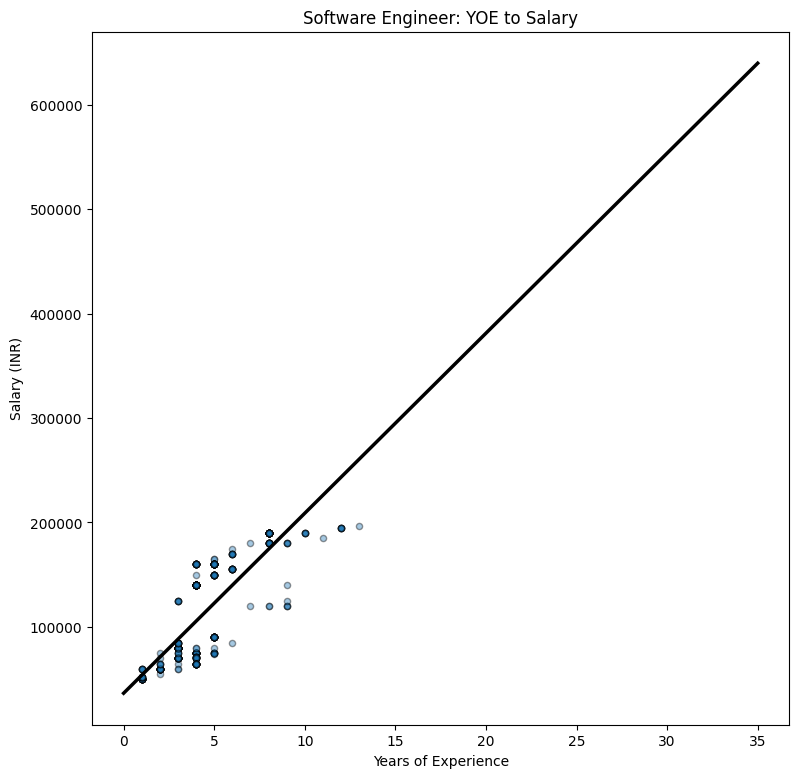

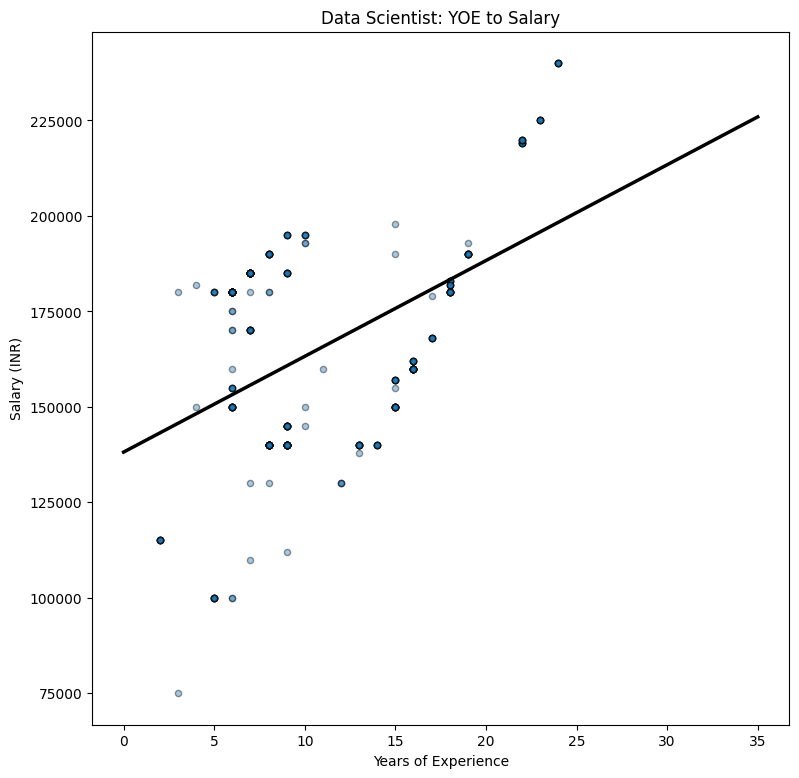

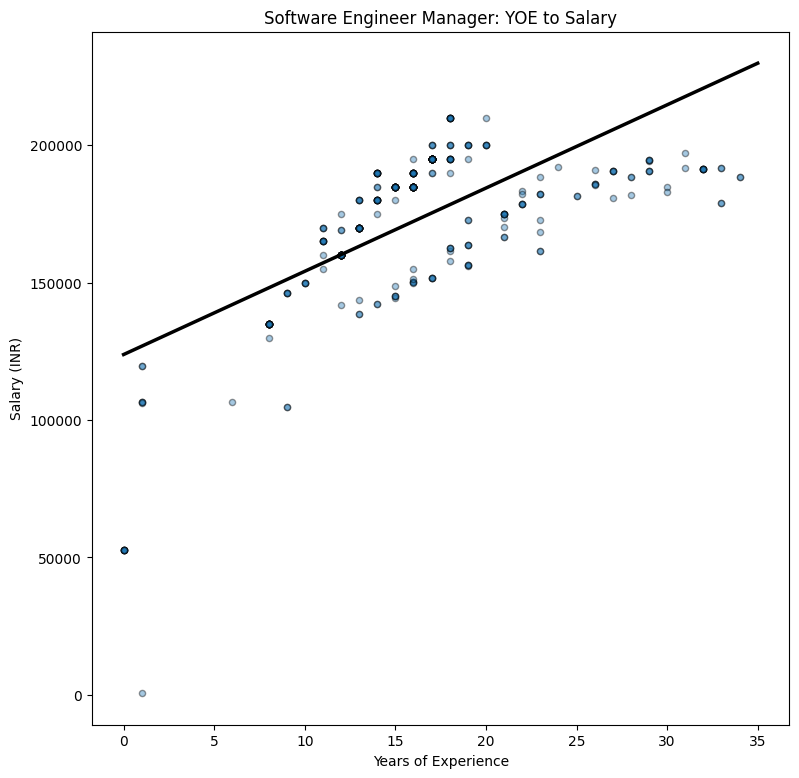

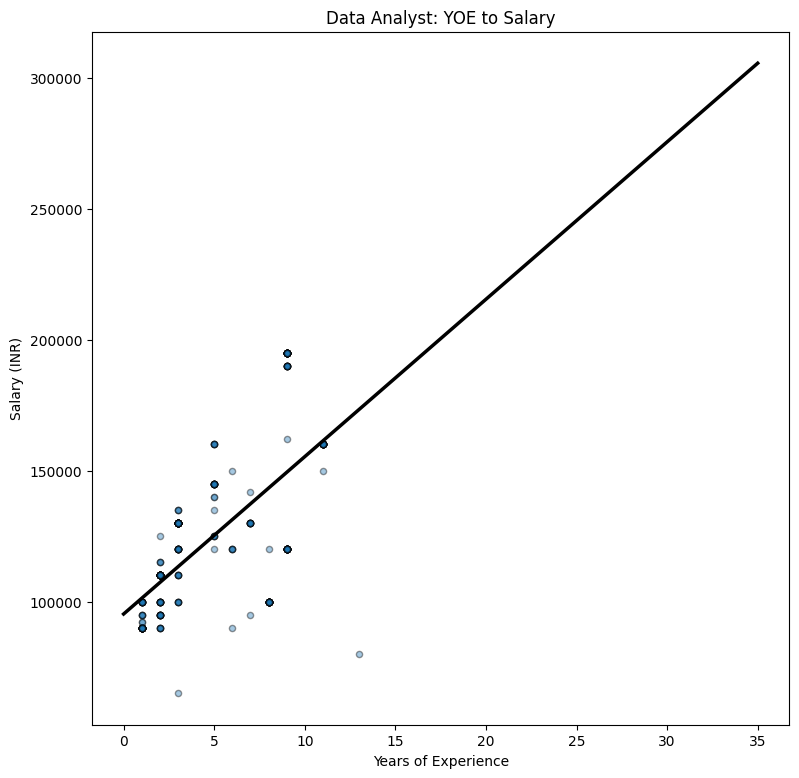

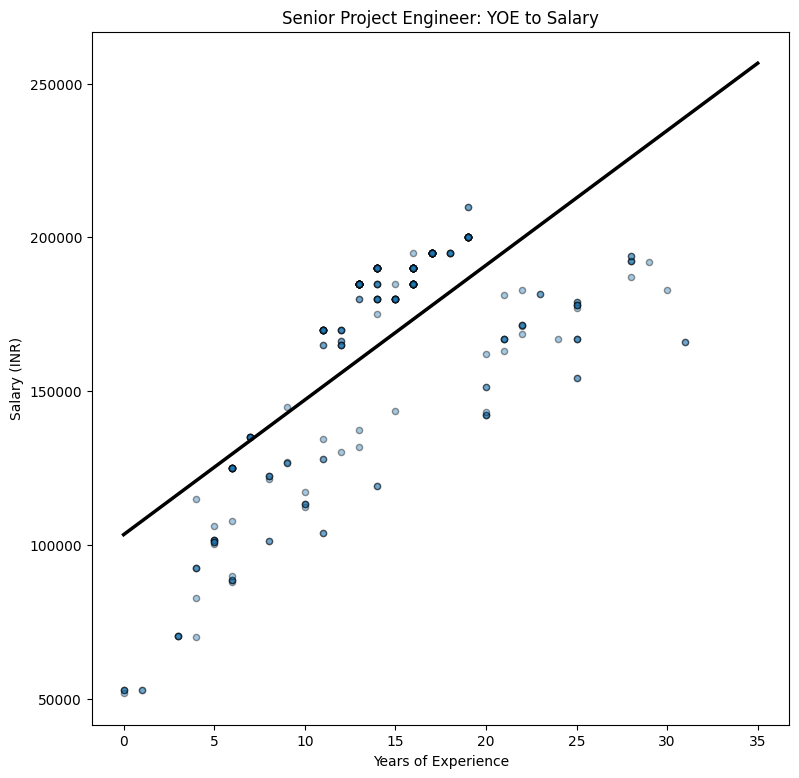

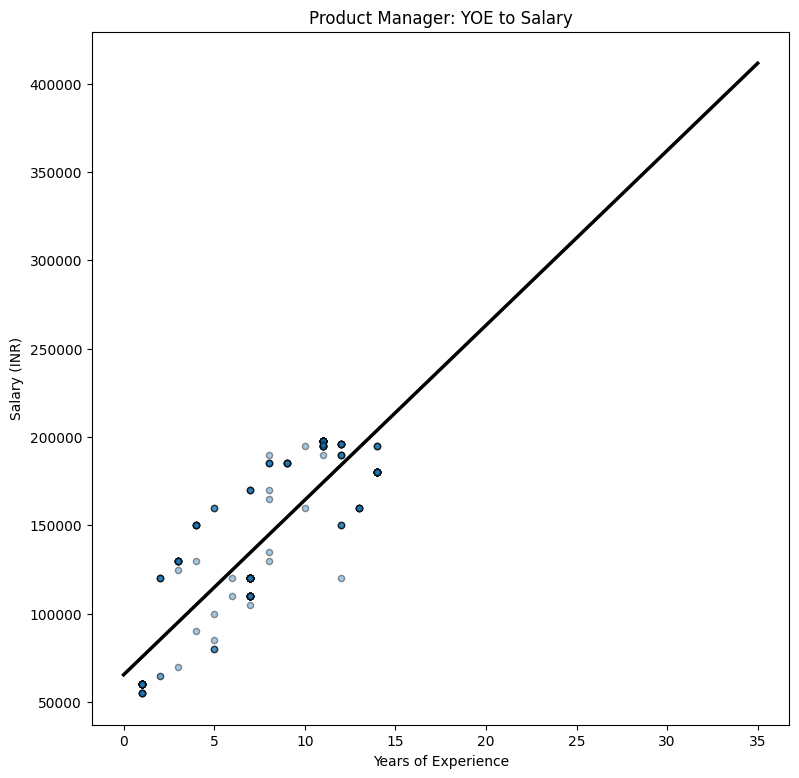

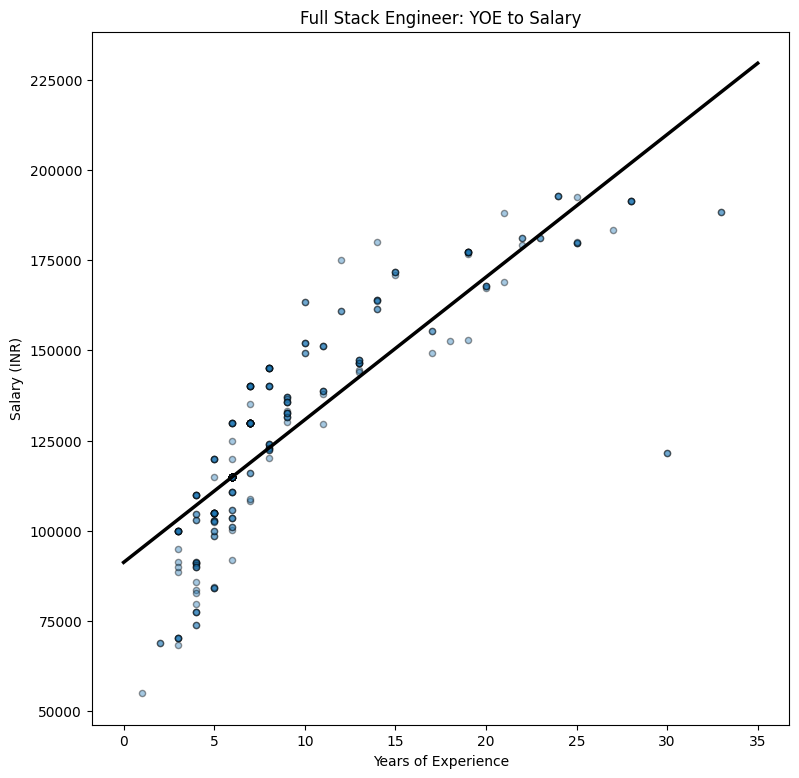

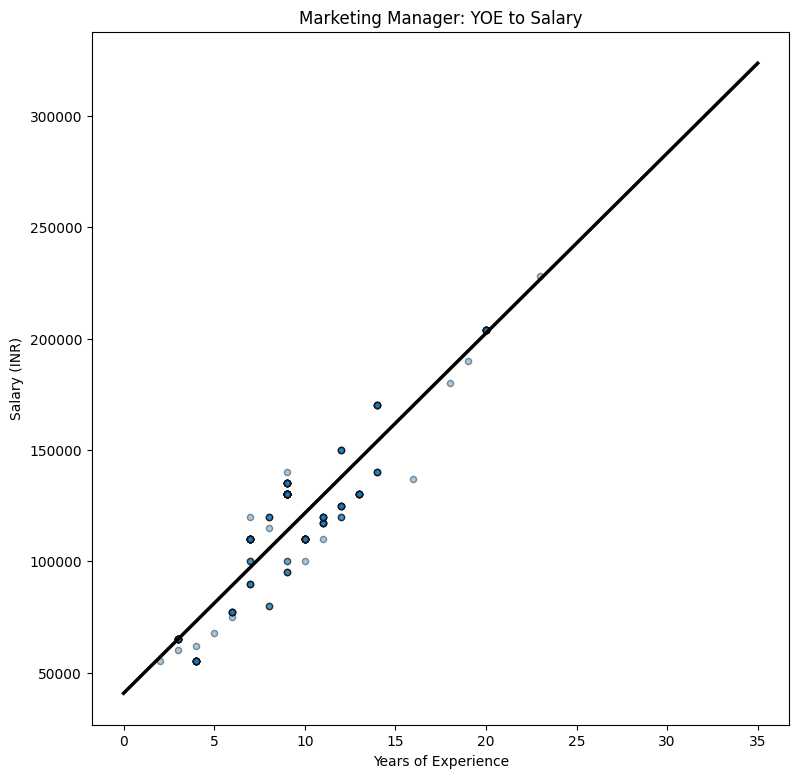

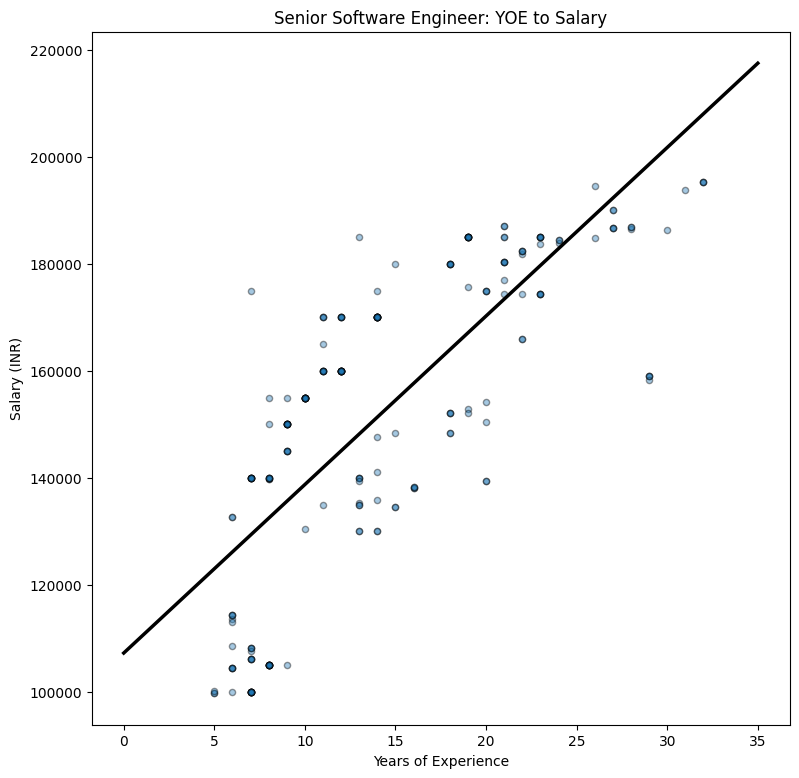

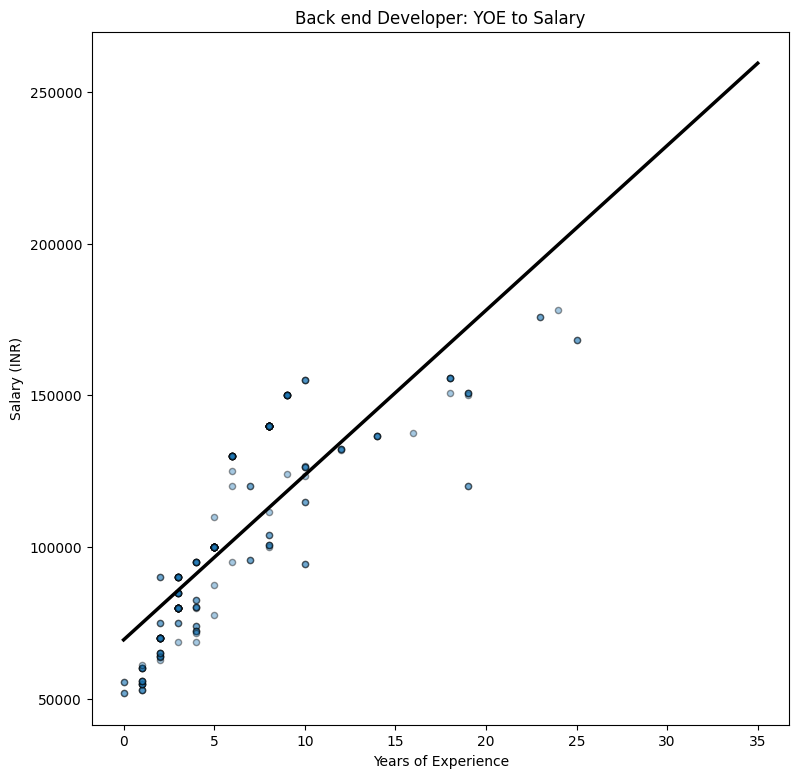

In [60]:
profession_df = {}

professions = [
"Software Engineer",
"Data Scientist",
"Software Engineer Manager",
"Data Analyst",
"Senior Project Engineer",
"Product Manager",
"Full Stack Engineer",
"Marketing Manager",
"Senior Software Engineer",
"Back end Developer"]

for profession in professions:

    profession_df[profession] = (cleaned_df[cleaned_df["Job Title"] == profession])

    yoe_salary_correlation = profession_df[profession]['Years of Experience'].corr(profession_df[profession]['Salary'])
    display(yoe_salary_correlation)

    fig, ax = plt.subplots(figsize=(9, 9))

    ax.scatter(profession_df[profession]['Years of Experience'], profession_df[profession]['Salary'], s=20, alpha=0.4, edgecolors="k")
    ax.set_title(f'{profession}: YOE to Salary')
    ax.set_ylabel('Salary (INR)')
    ax.set_xlabel('Years of Experience')
    b, a = np.polyfit(profession_df[profession]['Years of Experience'], profession_df[profession]['Salary'], deg=1)

    xseq = np.linspace(0, 35, num=100)

    ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

## Data Modeling


In this section of the tutorial we will use a machine learning modeling technique to understand just how important years of experience and higher education and gender is when it comes to salary.

Software Engineer: Linear Regression
Linear Regression mse_train: 824717717.8818996
Linear Regression mse_test: 930994684.2281344
Linear Regression r2_train: 0.6339013038278004
Linear Regression r2_test: 0.6272846428464194


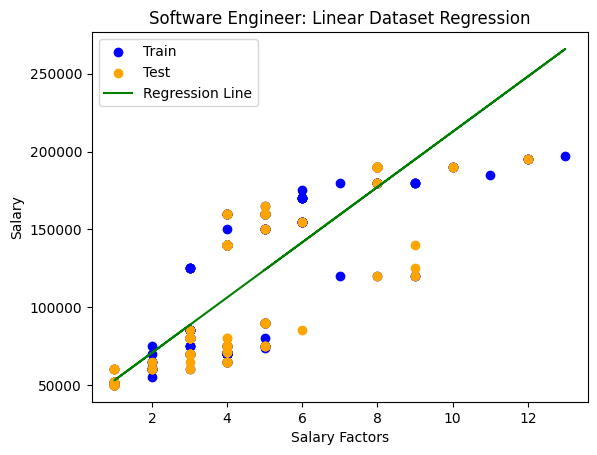

Data Scientist: Linear Regression
Linear Regression mse_train: 589344506.5512314
Linear Regression mse_test: 671073976.0191345
Linear Regression r2_train: 0.23866979526011
Linear Regression r2_test: 0.22720551508782882


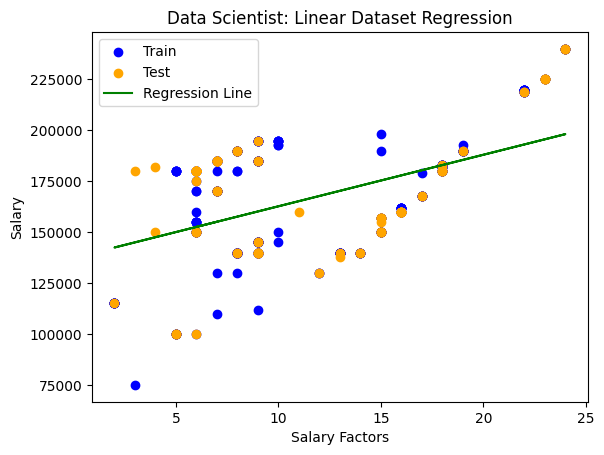

Software Engineer Manager: Linear Regression
Linear Regression mse_train: 416853722.45319235
Linear Regression mse_test: 658248146.606875
Linear Regression r2_train: 0.44603704221721197
Linear Regression r2_test: 0.42230869679900274


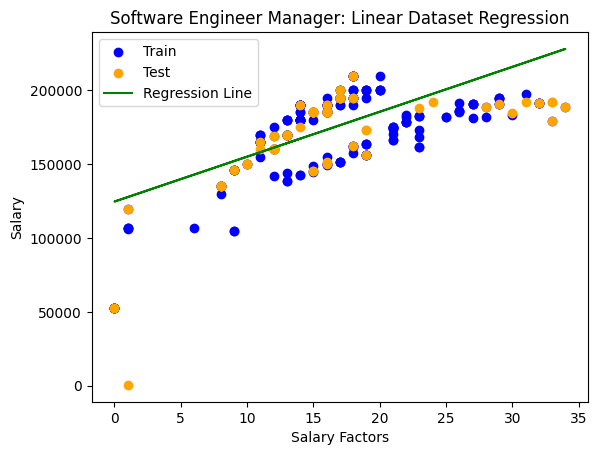

Data Analyst: Linear Regression
Linear Regression mse_train: 599952250.8090223
Linear Regression mse_test: 490463076.1724491
Linear Regression r2_train: 0.4122411524298718
Linear Regression r2_test: 0.41880016737172754


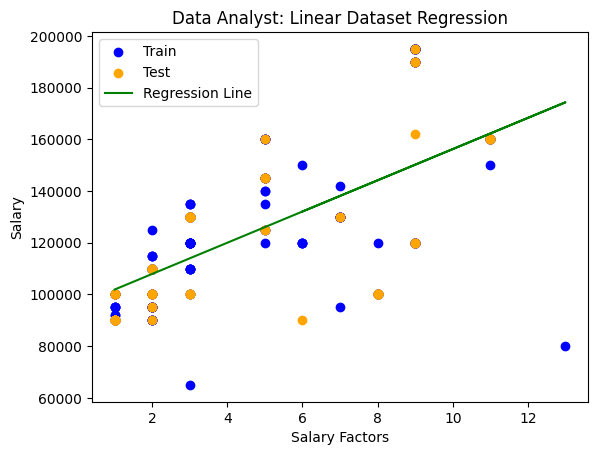

Senior Project Engineer: Linear Regression
Linear Regression mse_train: 648322114.577669
Linear Regression mse_test: 609365901.7065552
Linear Regression r2_train: 0.4810139652934753
Linear Regression r2_test: 0.5845313302853271


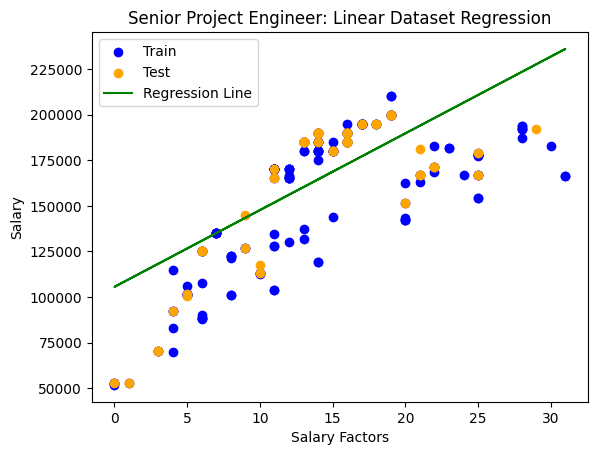

Product Manager: Linear Regression
Linear Regression mse_train: 612597110.3186023
Linear Regression mse_test: 585420199.7955401
Linear Regression r2_train: 0.7302071175999117
Linear Regression r2_test: 0.7583077838058515


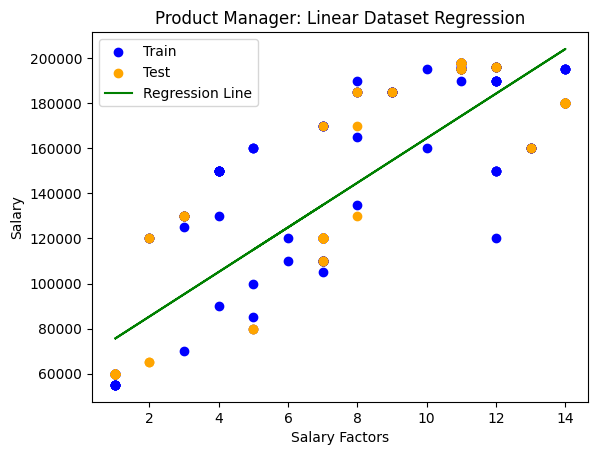

Full Stack Engineer: Linear Regression
Linear Regression mse_train: 245291724.17603612
Linear Regression mse_test: 182813010.2282441
Linear Regression r2_train: 0.705434213719706
Linear Regression r2_test: 0.787696150054217


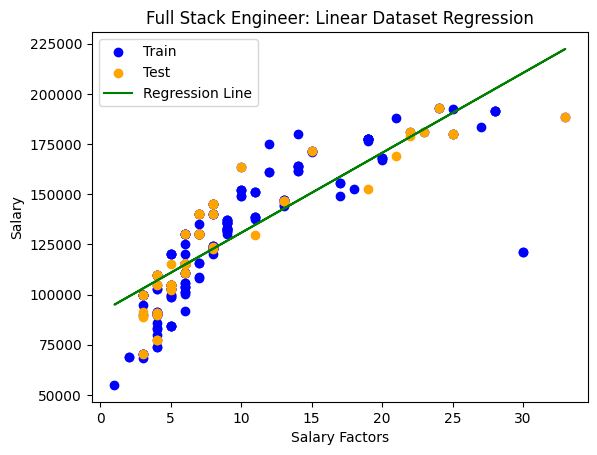

Marketing Manager: Linear Regression
Linear Regression mse_train: 203027318.13014314
Linear Regression mse_test: 218759607.19174454
Linear Regression r2_train: 0.8364111076207998
Linear Regression r2_test: 0.8669332385004199


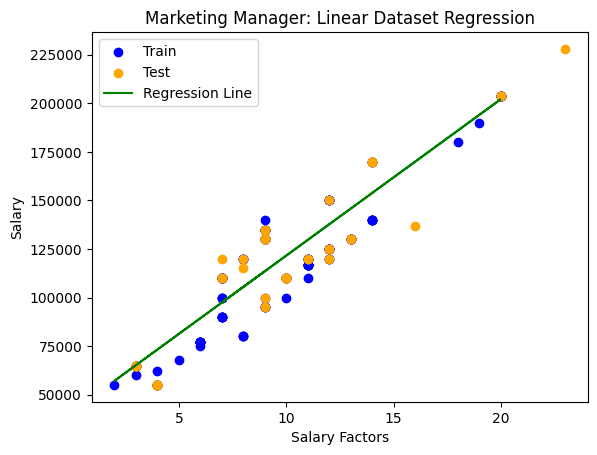

Senior Software Engineer: Linear Regression
Linear Regression mse_train: 336798794.44864744
Linear Regression mse_test: 326384412.9000072
Linear Regression r2_train: 0.5532321302787331
Linear Regression r2_test: 0.6385634130836777


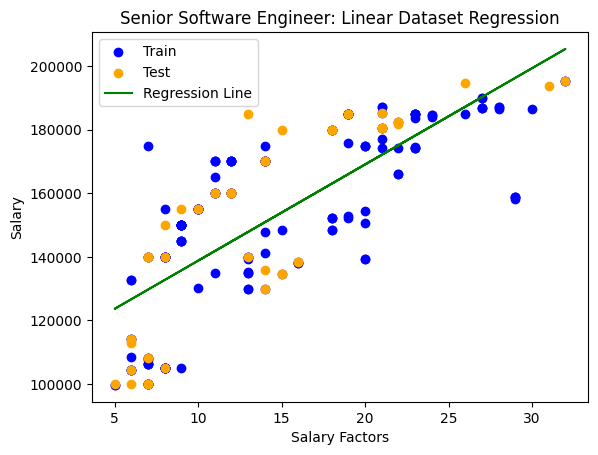

Back end Developer: Linear Regression
Linear Regression mse_train: 322892291.00760764
Linear Regression mse_test: 256740690.2600323
Linear Regression r2_train: 0.6845459256525641
Linear Regression r2_test: 0.7267337354459952


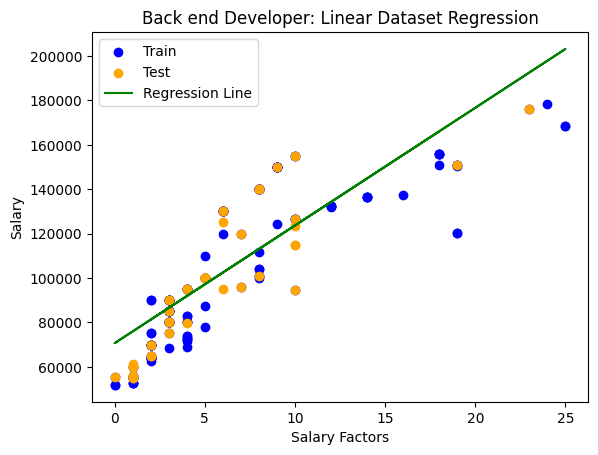

In [68]:
for profession in professions:
        X = profession_df[profession][["Years of Experience"]]
        Y = profession_df[profession]["Salary"]

        seed = 42
        test_size=0.2

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

        model = LinearRegression()
        model.fit(X_train, Y_train)

        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)


        mse_train = mean_squared_error(Y_train, Y_train_pred)
        mse_test = mean_squared_error(Y_test, Y_test_pred)
        r2_train = r2_score(Y_train, Y_train_pred)
        r2_test = r2_score(Y_test, Y_test_pred)

        print(f"{profession}: Linear Regression")
        print(f"Linear Regression mse_train: {mse_train}")
        print(f"Linear Regression mse_test: {mse_test}")
        print(f"Linear Regression r2_train: {r2_train}")
        print(f"Linear Regression r2_test: {r2_test}")

        plt.scatter(X_train, Y_train, color='blue', label='Train')
        plt.scatter(X_test, Y_test, color='orange', label='Test')
        plt.plot(X_train, Y_train_pred, color='green', label='Regression Line')
        plt.title(f"{profession}: Linear Dataset Regression")
        plt.xlabel("Salary Factors")
        plt.ylabel("Salary")
        plt.legend()
        plt.show()

So what we have done here is a simple regression training for each profession's Year of Experiences on Salary.

## Conclusion


In conclusion we can see that not only are factors such as education level, years of experience, and even gender contribute to the difference in salary but we can also see that there are ways to predict what salary someone can expect using different regression models. Additionally we can see that for different professions the amount of variance that years of experience contribute to is also different, so for future research it could be interesting to investigate profession and career growth further. Hopefully if you were not already familiar with the different factors of salary you can now know that years of experience and education level play a large role in it, and if it was already familiar you can take away the different data science tools and techniques needed to further analyze data.